In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-30 20:50:30,587 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:50:30,588 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:50:30,589 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:50:30,596 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-30 20:50:30,596 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:50:30,614 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-30 20:50:31,141 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:50:31,145 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:50:31,146 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:50:31,146 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:50:31,147 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:50:31,147 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:50:31,147 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:50:31,149 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:50:31,738 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-30 20:50:31,883 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 20:50:31,884 - settings - Setting database.user to celiib
INFO - 2021-04-30 20:50:31,885 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 20:50:31,906 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 20:50:32,496 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 6
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135740225387, 864691135272164113, 864691136618403213,
       864691135974454383, 864691136134446219])


--- Working on Neuron 864691135740225387 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [537544.12308935 748196.07600502 851154.4169303 ]--------
kiss_check = True
winning_downstream = 1,error_downstream = [2 3] 
coordinate [537544.12308935 748196.07600502 851154.4169303 ] had error branches [2 3]--------


 ----- Working on coordinate 1: [550317.63660057 724752.25523179 850949.91251663]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [550317.63660057 724752.25523179 850949.91251663] had error branches []--------


 ----- Working on coordinate 2: [556948.74046905 751355.77893429 861505.53793033]--------
kiss_check = True
winning_downstream = 25,error_downstream = [26  7] 
coordinate [556948.74046905 751355.77893429 861505.53793033] had error branches [26  7]--------


 ----- Working on coordinate 3: [581415.81144569 759370.80331995 882057.43412752]--------
kiss_check = True
winning_downstream = 39,er

winning_downstream = 90,error_downstream = [101 110] 
coordinate [679545.43968348 930632.83768461 901975.75511336] had error branches [101 110]--------


 ----- Working on coordinate 12: [688242.20965952 926916.21081485 893063.38200433]--------
kiss_check = True
winning_downstream = 123,error_downstream = [118 113] 
coordinate [688242.20965952 926916.21081485 893063.38200433] had error branches [118 113]--------


 ----- Working on coordinate 13: [727694.58354496 715504.93491359 755278.765696  ]--------
kiss_check = True
winning_downstream = 138,error_downstream = [141 137] 
coordinate [727694.58354496 715504.93491359 755278.765696  ] had error branches [141 137]--------


 ----- Working on coordinate 14: [745324.07175207 916358.86683495 841426.87349568]--------
kiss_check = True
winning_downstream = None,error_downstream = [148 149 150] 
coordinate [745324.07175207 916358.86683495 841426.87349568] had error branches [148 149 150]--------


 ----- Working on coordinate 15: [749818.4952

** triggered kiss check cut becuase cut_bbox_longest_side = 331.3151118727401***
winning_downstream = 204,error_downstream = [213 219] 
coordinate [822703.77803272 682389.52909662 661575.94621627] had error branches [213 219]--------


 ----- Working on coordinate 20: [822962.46963607 649647.69820679 709809.58366863]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [822962.46963607 649647.69820679 709809.58366863] had error branches []--------


 ----- Working on coordinate 21: [823714.78336826 758441.65167372 721570.95214975]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [223, 224]


winning_downstream = 223,error_downstream = [216 224] 
coordinate [823714.78336826 758441.65167372 721570.95214975] had error branches [216 224]--------


 ----- Working on coordinate 22: [825392.76930391 697233.05908961 739780.98928562]--------
kiss_check = True
winning_downstream = 197,error_downstream = [225 227 230] 
coordinate [825392.76930391 697233.05908961 739780.98928562] had error branches [225 227 230]--------


 ----- Working on coordinate 23: [827286.37369919 690177.80827972 658169.68068285]--------
kiss_check = True
winning_downstream = 237,error_downstream = [232 239 221] 
coordinate [827286.37369919 690177.80827972 658169.68068285] had error branches [232 239 221]--------


 ----- Working on coordinate 24: [827498.48189145 754589.02575464 721373.16960946]--------
kiss_check = True
winning_downstream = 240,error_downstream = [226 238] 
coordinate [827498.48189145 754589.02575464 721373.16960946] had error branches [226 238]--------


 ----- Working on coordinate 25: [833

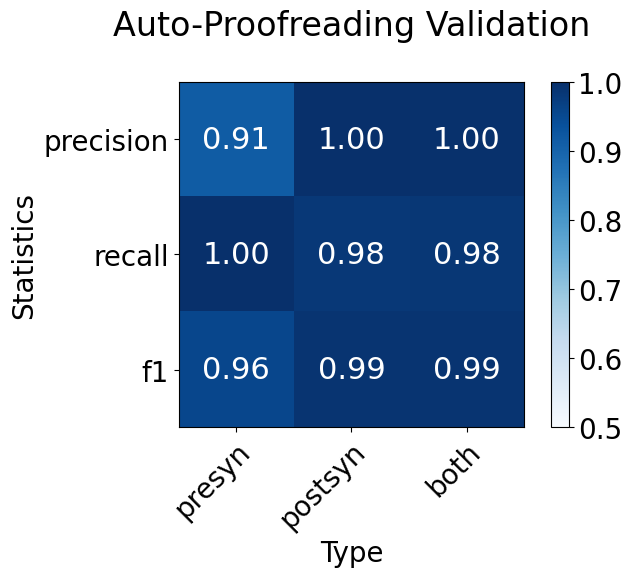

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135740225387_validation_df.pbz2
File size is 0.051086 MB
Total time for neuron 864691135740225387: 268.15323138237

--- Working on Neuron 864691135272164113 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1112070.94034511  687866.66492916 1007934.61828425]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1112070.94034511  687866.66492916 1007934.61828425] had error branches []--------


 ----- Working on coordinate 1: [1138829.48235962  762579.58028237 1080261.35048637]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [22, 81]
winning_downstream = 22,error_downstream = [81 82 86] 
coordinate [1138829.48235962  762579.58028237 1080261.35048637] had error branches [81 82 86]--------


 ----- Working on coordinate 2: [1154644.   762275.5 1074263. ]--------
k

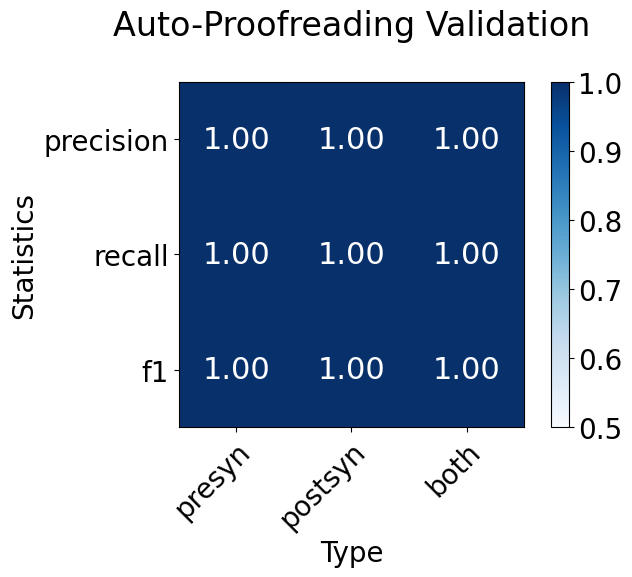

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135272164113_validation_df.pbz2
File size is 0.115536 MB
Total time for neuron 864691135272164113: 261.77477192878723

--- Working on Neuron 864691136618403213 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1125333.47568904  770283.01546975  941101.64914749]--------
kiss_check = True
winning_downstream = 2,error_downstream = [3 5] 
coordinate [1125333.47568904  770283.01546975  941101.64914749] had error branches [3 5]--------


 ----- Working on coordinate 1: [1151355.90408341  826561.07964953 1026299.89868937]--------
kiss_check = True
winning_downstream = None,error_downstream = [22 23 21] 
coordinate [1151355.90408341  826561.07964953 1026299.89868937] had error branches [22 23 21]--------


 ----- Working on coordinate 2: [1173463.86110299  826063.57389872 1037349.04932548]--------
kiss_check = True
winning_downstream = 34,error_downstre

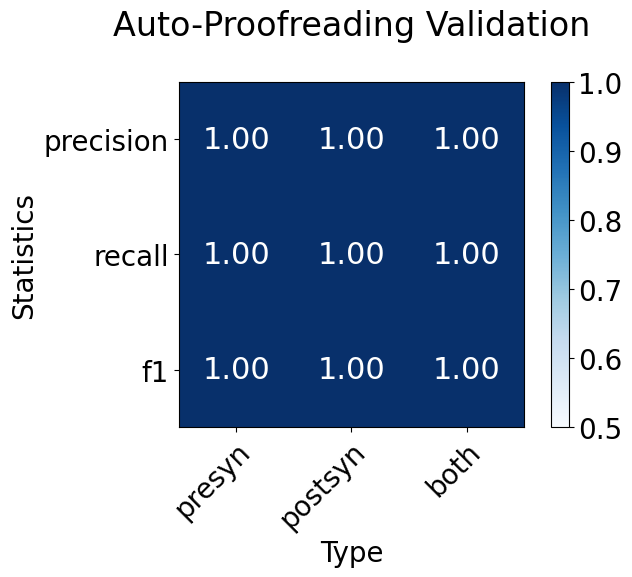

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136618403213_validation_df.pbz2
File size is 0.064719 MB
Total time for neuron 864691136618403213: 121.20861148834229

--- Working on Neuron 864691135974454383 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [1126572.87699544  699073.01918174 1054412.97573984]--------
kiss_check = True
winning_downstream = 4,error_downstream = [8 9] 
coordinate [1126572.87699544  699073.01918174 1054412.97573984] had error branches [8 9]--------


 ----- Working on coordinate 1: [1146270.69919383  918285.42265269 1086061.27120456]--------
kiss_check = True
winning_downstream = 12,error_downstream = [14 11] 
coordinate [1146270.69919383  918285.42265269 1086061.27120456] had error branches [14 11]--------


 ----- Working on coordinate 2: [1150781.88806206  674368.65250079 1113626.42267623]--------
kiss_check = True
winning_downstream = 16,error_downstream = [18

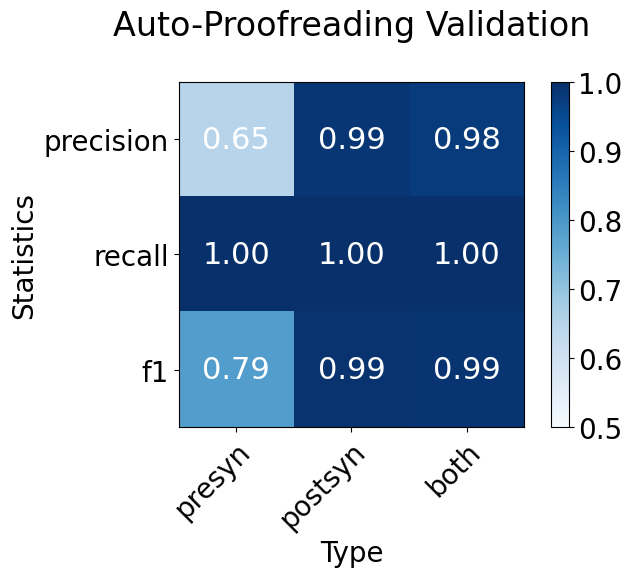

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135974454383_validation_df.pbz2
File size is 0.088114 MB
Total time for neuron 864691135974454383: 208.58510994911194

--- Working on Neuron 864691136134446219 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate 0: [981194.03744475 981266.57504955 883360.48293495]--------
kiss_check = True
winning_downstream = 2,error_downstream = [6 0] 
coordinate [981194.03744475 981266.57504955 883360.48293495] had error branches [6 0]--------


 ----- Working on coordinate 1: [1001679.  980112.  857136.]--------
kiss_check = True
winning_downstream = 18,error_downstream = [19 16] 
coordinate [1001679.  980112.  857136.] had error branches [19 16]--------


 ----- Working on coordinate 2: [1002947.50092087  978950.6278521   854251.3307155 ]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [10, 20]


** triggered kiss check cut becuase cut_bbox_longest_side = 221.78784050256945***
winning_downstream = 20,error_downstream = [21 10] 
coordinate [1002947.50092087  978950.6278521   854251.3307155 ] had error branches [21 10]--------


 ----- Working on coordinate 3: [1005926.25576366  980427.04448604  855429.06579702]--------
kiss_check = True
winning_downstream = 22,error_downstream = [17 24  1] 
coordinate [1005926.25576366  980427.04448604  855429.06579702] had error branches [17 24  1]--------


 ----- Working on coordinate 4: [1009763.98281372  974484.59775323  831681.0187258 ]--------
kiss_check = True
winning_downstream = 28,error_downstream = [27 29] 
coordinate [1009763.98281372  974484.59775323  831681.0187258 ] had error branches [27 29]--------


 ----- Working on coordinate 5: [1012711.50078563  978824.15497064  873575.03323082]--------
kiss_check = True
winning_downstream = 15,error_downstream = [31 32] 
coordinate [1012711.50078563  978824.15497064  873575.03323082] had 

winning_downstream = 60,error_downstream = [73 77 78 49] 
coordinate [1234111.94242809  914341.32479805  645452.80487954] had error branches [73 77 78 49]--------


 ----- Working on coordinate 13: [1240652.94406027  942633.98099959  717565.20506937]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [79, 80]
winning_downstream = 79,error_downstream = [80 98] 
coordinate [1240652.94406027  942633.98099959  717565.20506937] had error branches [80 98]--------


 ----- Working on coordinate 14: [1240992.48352078  967062.39747677  692517.54082403]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1240992.48352078  967062.39747677  692517.54082403] had error branches []--------


 ----- Working on coordinate 15: [1241018.16927127  967170.84671287  690238.79360203]--------
kiss_check = True
winning_downstream = 102,error_downstream = [97 88] 
coordinate [1241018.16927127  967170.84671287  690238.79360203] 

** triggered kiss check cut becuase cut_bbox_longest_side = 280.46363819926046***


** triggered kiss check cut becuase cut_bbox_longest_side = 195.95975273940712***
winning_downstream = 121,error_downstream = [125 127 129 120] 
coordinate [1247422.85627306  945643.23958195  728584.0239307 ] had error branches [125 127 129 120]--------


 ----- Working on coordinate 20: [1247943.66847253  947235.40854524  731038.17505688]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [130, 135]


** triggered kiss check cut becuase cut_bbox_longest_side = 81.52325463946909***
winning_downstream = 135,error_downstream = [114 130 134] 
coordinate [1247943.66847253  947235.40854524  731038.17505688] had error branches [114 130 134]--------


 ----- Working on coordinate 21: [1248319.9521855   949073.02361203  697837.11445603]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [61, 108, 113]
winning_downstream = 113,error_downstream = [108 126  61] 
coordinate [1248319.9521855   949073.02361203  697837.11445603] had error branches [108 126  61]--------


 ----- Working on coordinate 22: [1248539.79211469  942437.19227678  698706.48797889]--------
kiss_check = True
winning_downstream = None,error_downstream = [112 115 117 118 128 136 137 142 143] 
coordinate [1248539.79211469  942437.19227678  698706.48797889] had error branches [112 115 117 118 128 136 137 142 143]--------


 ----- Working on coordinate 23: [1248673.89758722  943120

winning_downstream = 147,error_downstream = [133 139 146] 
coordinate [1248673.89758722  943120.2047638   723217.24451308] had error branches [133 139 146]--------


 ----- Working on coordinate 24: [1249634.11944003  948257.23235041  734033.03203436]--------
kiss_check = True
winning_downstream = 123,error_downstream = [145 149] 
coordinate [1249634.11944003  948257.23235041  734033.03203436] had error branches [145 149]--------


 ----- Working on coordinate 25: [1251230.61268525  948622.37451255  684334.6970696 ]--------
kiss_check = True
Working on Kissing check because possible upstream matches greater than 1: [158, 162]


** triggered kiss check cut becuase cut_bbox_longest_side = 83.60004741605371***
winning_downstream = 158,error_downstream = [154 162] 
coordinate [1251230.61268525  948622.37451255  684334.6970696 ] had error branches [154 162]--------


 ----- Working on coordinate 26: [1255044.78203527  947551.98949985  710768.56171198]--------
kiss_check = True
winning_downstream = 140,error_downstream = [144 191] 
coordinate [1255044.78203527  947551.98949985  710768.56171198] had error branches [144 191]--------


 ----- Working on coordinate 27: [1256760.40445185  943787.64253443  698939.74171418]--------
kiss_check = True
winning_downstream = 152,error_downstream = [171 188] 
coordinate [1256760.40445185  943787.64253443  698939.74171418] had error branches [171 188]--------


 ----- Working on coordinate 28: [1260338.37162998  691770.73843281  647075.91954436]--------
kiss_check = True
winning_downstream = 207,error_downstream = [218 222] 
coordinate [1260338.37162998  691770.73843281  647075.

winning_downstream = 251,error_downstream = [200 253 255] 
coordinate [1264715.65665501  936918.47050945  698017.1436793 ] had error branches [200 253 255]--------


 ----- Working on coordinate 31: [1266950.06255043  937043.64935502  697985.37086434]--------
kiss_check = True
winning_downstream = 263,error_downstream = [258 262] 
coordinate [1266950.06255043  937043.64935502  697985.37086434] had error branches [258 262]--------


 ----- Working on coordinate 32: [1272537.13922369  820686.9900409   718279.66470813]--------
kiss_check = True
winning_downstream = 290,error_downstream = [288 272] 
coordinate [1272537.13922369  820686.9900409   718279.66470813] had error branches [288 272]--------


 ----- Working on coordinate 33: [1275314.34596632  945285.36853761  759899.44466011]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1275314.34596632  945285.36853761  759899.44466011] had error branches []--------


 ----- Working on coordinate 34: [128

** triggered kiss check cut becuase cut_bbox_longest_side = 251.86365529056638***
winning_downstream = 429,error_downstream = [425 428] 
coordinate [1315158.61161351  968063.14881802  742308.4627955 ] had error branches [425 428]--------


 ----- Working on coordinate 47: [1315678.3830523  1044885.5414044   857509.07433823]--------
kiss_check = True
winning_downstream = None,error_downstream = [] 
coordinate [1315678.3830523  1044885.5414044   857509.07433823] had error branches []--------


 ----- Working on coordinate 48: [1405659.7174328   738922.00723561  623267.33770921]--------
kiss_check = True
winning_downstream = 468,error_downstream = [467 469] 
coordinate [1405659.7174328   738922.00723561  623267.33770921] had error branches [467 469]--------
limb_branch_dict_to_cancel = {'L1': array([  6,   0,  19,  16,  21,  10,  17,  24,   1,  27,  29,  31,  32,
        54,  56,  53,  59,  50,  44,  48,  51,  57,  58,  61,  63,  65,
        66,  34,  47,  62,  68,  69,  70,  71,  72,  73

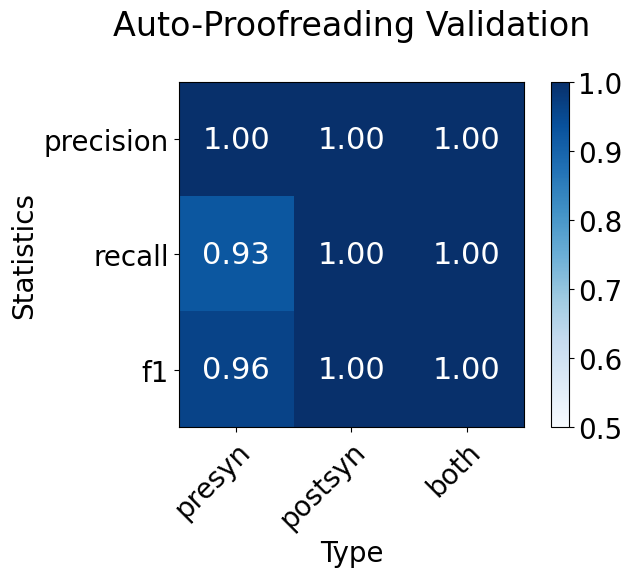

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136134446219_validation_df.pbz2
File size is 0.165508 MB
Total time for neuron 864691136134446219: 556.6668665409088


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")